<a href="https://colab.research.google.com/github/saireddy12/Eda/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> About The DataSet </h2>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.


Inspiration
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?


### Columns
<HTML>
<ol>
<li>listing ID</li>
<li>name of the listing</li>
<li>host_id</li>
<li>name of the host</li>
<li>neighbourhood_grouplocation</li>
<li>neighbourhoodarea</li>
<li>latitudelatitude coordinates</li>
<li>longitudelongitude coordinates</li>
<li>room_typelisting space type</li>
<li>price in dollars</li>
<li>amount of nights minimum</li>
<li>number of reviews</li>
<li>latest review</li>
<li>number of reviews per month</li>
<li>amount of listing per host</li>
<li>number of days when listing is available for booking</li>
</ol>
</HTML>

## Reading the Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy

In [0]:

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1m92b4razyBYx6yOIhLpdpbYF8xYNlyie'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Airbnb.csv') 

In [0]:
project_data=pd.read_csv('Airbnb.csv')

In [0]:
project_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
# finding Number of rows and columns
print("Number of data points in resources data", project_data.shape)
print("="*100)


Number of data points in resources data (48895, 16)


In [0]:
# columns/features in the dataset
print("Names of features are:- ")
print(project_data.columns.values)

Names of features are:- 
['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']


In [0]:
#to check about the data type of the columns
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
#to check for null values
np.sum(project_data.isna())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 Firstly We will check weather  the features with null values are usefull or not then if they are usefull then we  will fill those null values else we will discard those

In [0]:
#Neighbourhood Group
project_data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [0]:
# to find the correlation between the features
project_data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000



Note:                                                                                                                        
 Positive Value Indicates Positive Relationship(if x increases then y increases)                                                               
 Negative Value Indicates Negative Relationship (if x increases then y Decreases)

In [0]:
#to get the details like number of observations, min,max,25%,50%,75% ,mean,std
project_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


***Observations:-***            
1.The average price is 152 dollars                              
2.There is a 50% chance that the rooms will be available for atleast 45 days                   
3.75% of people spend 5 nights                                                  
4.Average Number of Host listings are 7       


# EXPLORATORY DATA ANALYSIS (EDA) #

## Univariate Analysis

To Check how the features are Distrubuted (or) To find there range(variance)


Checking Distribution of price from 0-2000

Distributions plots Source Code:-                                            
 https://www.kaggle.com/adikeshri/what-s-up-with-new-york

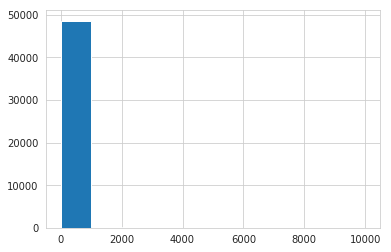

In [0]:
# Histograms for univariate Analysis
plt.hist(project_data['price'])
plt.show()

Observations:
    price is mostly less than 2000

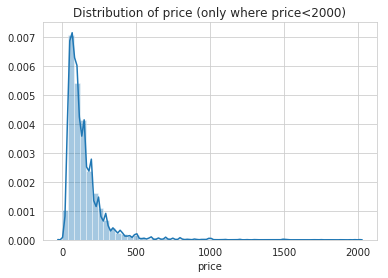

In [0]:
sns.distplot(project_data[project_data.price<2000].price)
plt.title('Distribution of price (only where price<2000)')
plt.show()

Obseravtion:

 Price of Most of the Listings are 10-200


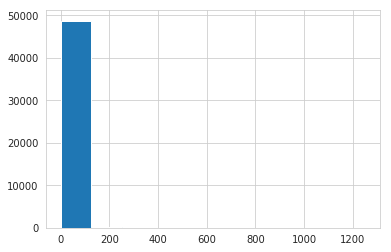

In [0]:
# Histograms for univariate Analysis
plt.hist(project_data['minimum_nights'])
plt.show()

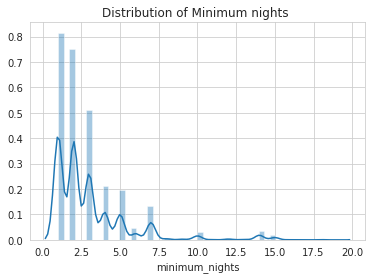

In [0]:
sns.distplot(project_data[project_data.minimum_nights<20].minimum_nights)
plt.title('Distribution of Minimum nights ')
plt.show()

Observations:
    Most of the nights stayed are mostly 2-7 days

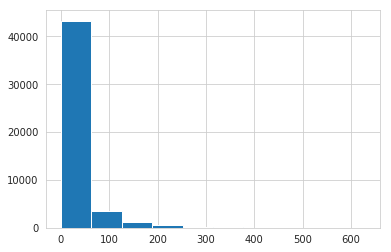

In [0]:
# Histograms for univariate Analysis
plt.hist(project_data['number_of_reviews'])
plt.show()

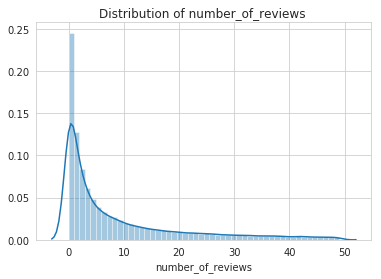

In [0]:
sns.distplot(project_data[project_data.number_of_reviews<50].number_of_reviews)
plt.title('Distribution of number_of_reviews ')
plt.show()

Observations:                                             
  There are More number listings with less Number of reviews(0-10) 

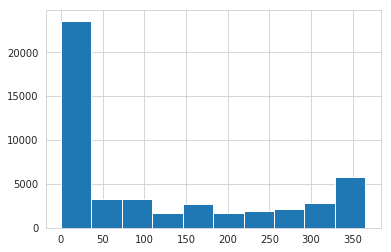

In [0]:
# Histograms for univariate Analysis
plt.hist(project_data['availability_365'])
plt.show()

Observations:-                                                    
    There are less than number of listings which has more number of days(<50) of availability

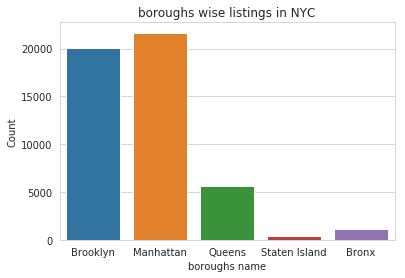

In [0]:
#https://www.kaggle.com/adikeshri/what-s-up-with-new-york
sns.countplot(project_data['neighbourhood_group'])
plt.title('boroughs wise listings in NYC')
plt.xlabel('boroughs name')
plt.ylabel('Count')
plt.show()

Inspiration                                                                           
4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?                                                                                                                                  
Ans:-Yes, there is a huge traffic difference among (Brooklyn , Manhattan) and ( queens staten Island Bronx)
     
Manhattan has Highest number of listings because 

Manhattan is the center of theater, visual arts, television, museums, finance, advertising, and much more Which attracts Many Tourits 

Brooklyn has  more Number of listings after Manhattan because Brooklyn is Famous for its freak shows and rickety old roller coaster, the legendary beach is also home to the New York Aquarium.

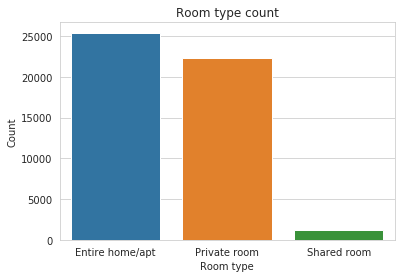

In [0]:
sns.countplot(project_data.sort_values('room_type').room_type)
plt.title('Room type count')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()


Observation:-                                           
Most of the Listings are Entire Home/apartments and private rooms 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


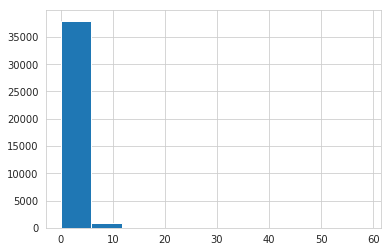

In [0]:
# Histograms for univariate Analysis
plt.hist(project_data['reviews_per_month'])
plt.show()

Observations:
    Almost 95% of them have reviews per month less than 10

# Bi-variate Analysis

##  2-D Scatter Plots

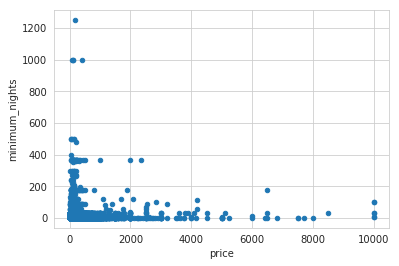

In [0]:
project_data.plot(kind='scatter', x='price', y='minimum_nights') ;
plt.show()

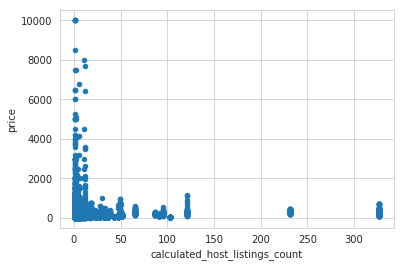

In [0]:
project_data.plot(kind='scatter', y='price', x='calculated_host_listings_count') ;
plt.show()

Obsevations:
    Most(75%) of the host listing count are less than 50

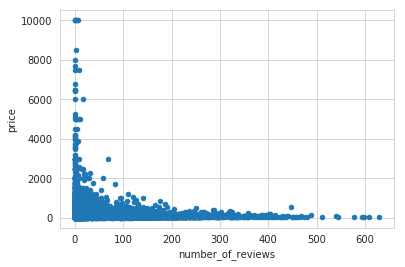

In [0]:
project_data.plot(kind='scatter', y='price', x='number_of_reviews') ;
plt.show()

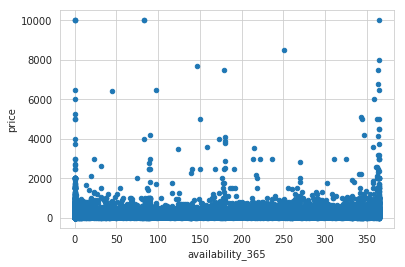

In [0]:
project_data.plot(kind='scatter', y='price', x='availability_365') ;
plt.show()

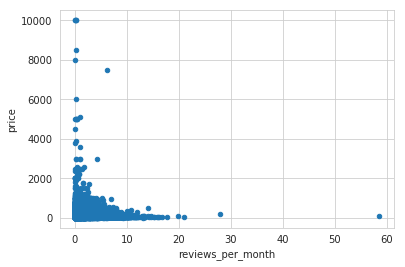

In [0]:
project_data.plot(kind='scatter', y='price', x='reviews_per_month') ;
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


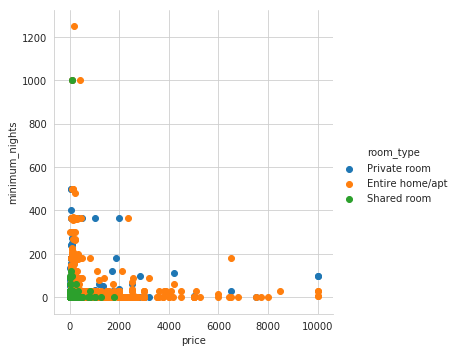

In [0]:
# soure: previous project
sns.set_style("whitegrid");
sns.FacetGrid(project_data,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


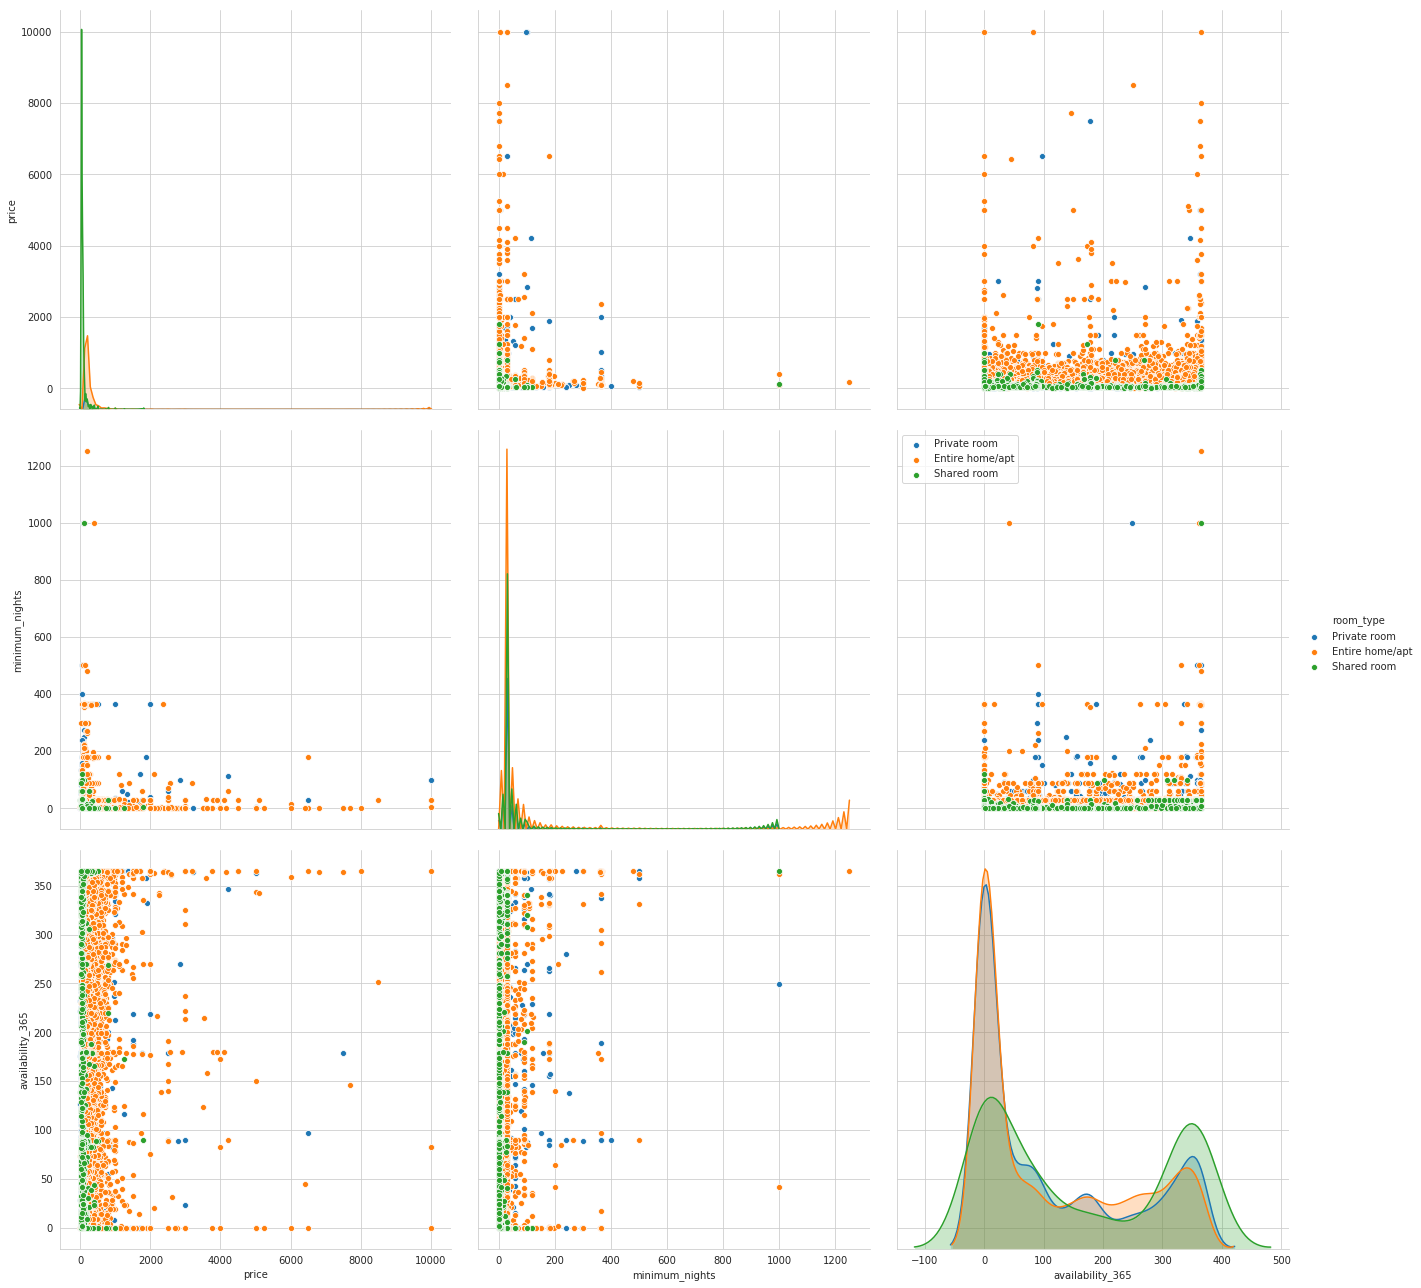

In [0]:
# pairwise scatter plot: Pair-Plot.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(project_data,hue='room_type',vars=['price','minimum_nights','availability_365'],size=6,diag_kind='kde');
plt.legend()
plt.show() 
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observation:                 
Price of Shared room is lower than  private room and entire house/ apartment                  
   

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


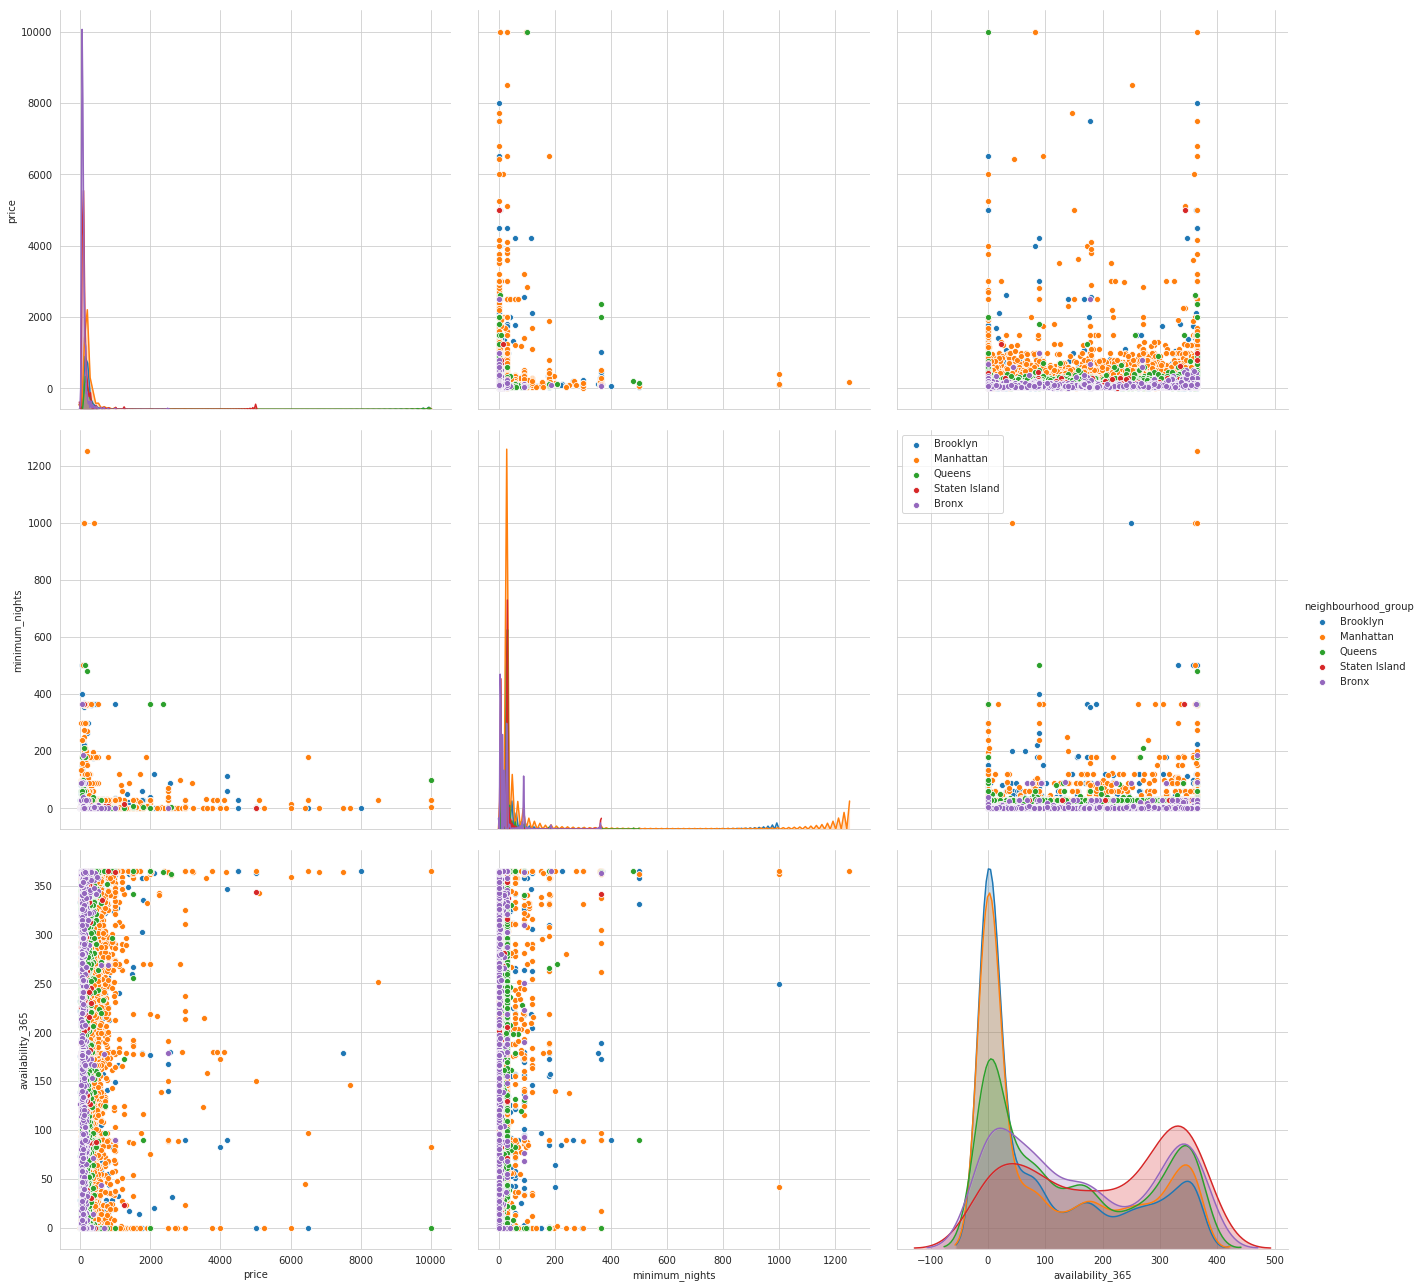

In [0]:
# pairwise scatter plot: Pair-Plot.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(project_data,hue='neighbourhood_group',vars=['price','minimum_nights','availability_365'],size=6,diag_kind='kde');
plt.legend()
plt.show() 
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations:
    Bronx has less number of night stays as compared to other

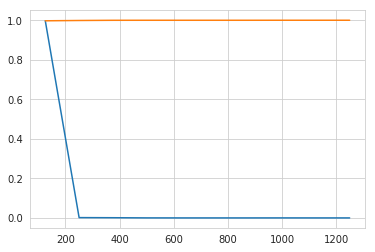

30.0


In [0]:
counts,bin_edges=np.histogram(project_data['minimum_nights'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()
print(np.percentile(project_data['minimum_nights'],95))

observations:-
    95% of Minimum Number of nights are less than 30days

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


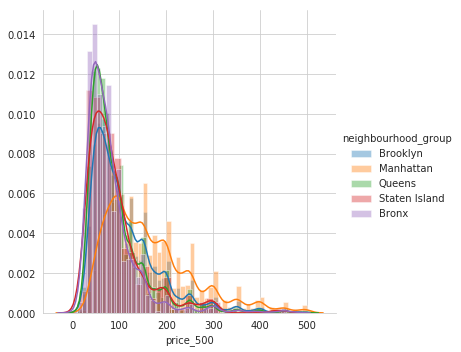

In [0]:
project_data['price_500']=project_data[project_data.price<500].price
sns.FacetGrid(project_data,hue='neighbourhood_group',height=5).map(sns.distplot,'price_500').add_legend()
plt.show()

Observations:                                                   

    price of Rooms in Manhattan and Brooklyn boroughs are more than the rooms in boroughs

In [0]:
project_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_500'],
      dtype='object')

# Data Preprocessing

### from the above analysis it is clear that 'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month' has no impact or correlation to the price column  so  I am Ignoring the above columns 


In [0]:
project_data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review', 'reviews_per_month','price_500'], axis=1, inplace=True)

In [0]:
project_data.head(2)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Y = project_data['price']
X = project_data[['neighbourhood_group', 'longitude', 'room_type', 'minimum_nights','availability_365','latitude', 'calculated_host_listings_count']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("Train set shape:")
print(X_train.shape)
print(Y_train.shape)
print("="*50)
print("Test set shape:")
print(X_test.shape)
print(Y_test.shape)

Train set shape:
(39116, 7)
(39116,)
Test set shape:
(9779, 7)
(9779,)


## Encoding Categorical Values

In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_train_ng= lb.fit_transform(X_train['neighbourhood_group'])
lb_test_ng= lb.transform(X_test['neighbourhood_group'])

lb_train_ng = pd.DataFrame(lb_train_ng, columns=lb.classes_)
lb_test_ng = pd.DataFrame(lb_test_ng, columns=lb.classes_)

print("After vectorizations")
print(lb_train_ng.shape, Y_train.shape)
print(lb_test_ng.shape, Y_test.shape)

After vectorizations
(39116, 5) (39116,)
(9779, 5) (9779,)


In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_train_rt= lb.fit_transform(X_train['room_type'])
lb_test_rt= lb.transform(X_test['room_type'])

lb_train_rt = pd.DataFrame(lb_train_rt, columns=lb.classes_)
lb_test_rt = pd.DataFrame(lb_test_rt, columns=lb.classes_)

print("After vectorizations")
print(lb_train_rt.shape, Y_train.shape)
print(lb_test_rt.shape, Y_test.shape)

After vectorizations
(39116, 3) (39116,)
(9779, 3) (9779,)


In [0]:
#source Kaggle
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['availability_365'].values.reshape(-1,1))

X_train_av_std = standard_vec.transform(X_train['availability_365'].values.reshape(-1,1))
X_test_av_std = standard_vec.transform(X_test['availability_365'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_av_std.shape, Y_train.shape)
print(X_test_av_std.shape, Y_test.shape)


After vectorizations
(39116, 1) (39116,)
(9779, 1) (9779,)


In [0]:
#source Kaggle
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)

standard_vec.fit(X_train['calculated_host_listings_count'].values.reshape(-1,1))

X_train_chl_std = standard_vec.transform(X_train['calculated_host_listings_count'].values.reshape(-1,1))
X_test_chl_std = standard_vec.transform(X_test['calculated_host_listings_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_chl_std.shape, Y_train.shape)
print(X_test_chl_std.shape, Y_test.shape)


After vectorizations
(39116, 1) (39116,)
(9779, 1) (9779,)


In [0]:
#source Kaggle
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
standard_vec.fit(X_train['minimum_nights'].values.reshape(-1,1))

X_train_mn_std = standard_vec.transform(X_train['minimum_nights'].values.reshape(-1,1))

X_test_mn_std = standard_vec.transform(X_test['minimum_nights'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_mn_std.shape, Y_train.shape)
print(X_test_mn_std.shape, Y_test.shape)


After vectorizations
(39116, 1) (39116,)
(9779, 1) (9779,)


In [0]:
#source Kaggle
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['latitude'].values.reshape(-1,1))

X_train_l_std = standard_vec.transform(X_train['latitude'].values.reshape(-1,1))
X_test_l_std = standard_vec.transform(X_test['latitude'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_l_std.shape, Y_train.shape)
print(X_test_l_std.shape, Y_test.shape)


After vectorizations
(39116, 1) (39116,)
(9779, 1) (9779,)


In [0]:
#source Kaggle
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
standard_vec.fit(X_train['longitude'].values.reshape(-1,1))

X_train_lo_std = standard_vec.transform(X_train['longitude'].values.reshape(-1,1))
X_test_lo_std = standard_vec.transform(X_test['longitude'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_lo_std.shape, Y_train.shape)
print(X_test_lo_std.shape, Y_test.shape)


After vectorizations
(39116, 1) (39116,)
(9779, 1) (9779,)


## Concatinating features

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((lb_train_ng,lb_train_rt,X_train_av_std,X_train_chl_std,X_train_mn_std,X_train_l_std,X_train_lo_std)).tocsr()
X_te = hstack((lb_test_ng,lb_test_rt,X_test_av_std,X_test_chl_std,X_test_mn_std,X_test_l_std,X_test_lo_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_te.shape, Y_test.shape)
print("="*100)

Final Data matrix
(39116, 13) (39116,)
(9779, 13) (9779,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression().fit(X_tr, Y_train)
y_train_predict = lin_model.predict(X_tr)
tr_rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
tr_r2 = r2_score(Y_train, y_train_predict)

In [0]:

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(tr_r2*100))
print('RMSE  score is {}'.format(tr_rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_te)
te_rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
te_r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(te_r2*100))
print('RMSE  score is {}'.format(tr_rmse))

The model performance for training set
--------------------------------------
R2 score is 9.78068823324081
RMSE  score is 224.4585104919356


The model performance for testing set
--------------------------------------
R2 score is 8.595096822397874
RMSE  score is 224.4585104919356


In [0]:
error_frame = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': y_test_predict.flatten()})
error_frame.head(10)

,Actual,Predicted
0,112,50.579187
1,200,233.525943
2,188,208.738554
3,200,240.805979
4,165,71.277814
5,105,136.075964
6,120,168.907415
7,155,154.720242
8,107,140.742566
9,93,93.500911


Actul Vs Predicted


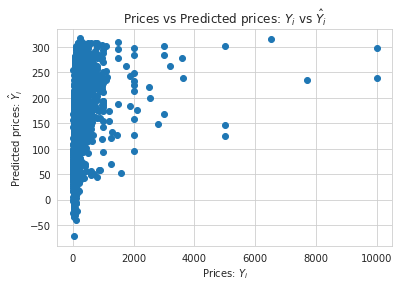

In [0]:

print("Actul Vs Predicted")
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

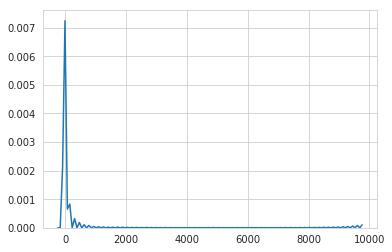

In [0]:
#Distribution of errors

delta_y = Y_test - y_test_predict;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


Prediction is not that accurate because the feature are not that useful for price prediction 

# SUMMARY


1.   Price of Most of the Listings are 10-200
2.   Price of Shared room is lower than private room and entire house/ apartment
3.   price of Rooms in Manhattan and Brooklyn boroughs are more than the rooms in boroughs
4.   75% of people spend 5 nights
5.   There is a 50% chance that the rooms will be available for atleast 45 days
6.Manhattan has Highest number of listings
7.Brooklyn has more Number of listings after Manhattan
8.Most of the Listings are Entire Home/apartments and private rooms
9.95% of them have reviews per month less than 10
10.Most(75%) of the host listing count are less than 50
11.Bronx has less number of night stays as compared to other